# Open Cluster Star Rotation Periods

Figure 10.8 from Chapter 10 of *Stellar Structure & Evolution* Pinsonneault & Ryden, Cambridge 
University Press.

Three-panel plot of rotation period versus mass for stars in the open clusters Upper Scorpius, Pleiades,
and Prasepe.  In each panel, dots = median Prot for each mass bin and error bars show the interquartile
range. The relation for the Pleiades is repeated as the dotted line in each panel.

Data are from the Godoy-Rivera et al. [2021, ApJS, 257, 46](https://ui.adsabs.harvard.edu/abs/2021ApJS..257...46G) (Pleiades and Praesepe), and Garcia et al. [2014, A&A, 572, 34](https://ui.adsabs.harvard.edu/abs/2014A%2526A...572A..34G) (Upper Scorpius, data from the [VizieR database](https://ui.adsabs.harvard.edu/abs/2014yCat..35720034G)).

Cluster ages adopted are
<ul>
 <li>Upper Sco: 10 Myr
 <li>Pleiades: 125 Myr
 <li>Praesepe: 700 Myr
</ul>

In [1]:
%matplotlib inline

import os, sys, math
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, LogLocator, NullFormatter
from matplotlib.patches import Ellipse

import warnings
warnings.filterwarnings('ignore',category=UserWarning, append=True)

## Standard Plot Format

Setup the standard plotting format and make the plot.

In [2]:
plotFile = 'Fig10_8.png' 

# graphic aspect ratio = width/height

aspect = 1.8

#
# Don't change these unless you really need to (we never have)
#
# fPage is the horizontal fraction of the page occupied by the figure, default 1.0
#
# scaleFac is the LaTeX includegraphics scaling in units of \textwidth, default 1.0
#

fPage = 1.0
scaleFac = 0.85

# Text width in inches - don't change, this is defined by the print layout

textWidth = 6.0 # inches

# Graphic dimensions depending on bitmap or vector format (draft vs production)

dpi = 600
plotWidth = dpi*fPage*textWidth
plotHeight = plotWidth/aspect
axisFontSize = 10
labelFontSize = 7
lwidth = 0.5
axisPad = 5
wInches = fPage*textWidth # float(plotWidth)/float(dpi)
hInches = wInches/aspect  # float(plotHeight)/float(dpi)
    
# LaTeX is used throughout for markup of symbols, Times-Roman serif font

plt.rc('text', usetex=True)
plt.rc('font', **{'family':'serif','serif':['Times-Roman'],'weight':'bold','size':'16'})

# Font and line weight defaults for axes

matplotlib.rc('axes',linewidth=lwidth)
matplotlib.rcParams.update({'font.size':axisFontSize})

# axis and label padding

plt.rcParams['xtick.major.pad']=f'{axisPad}'
plt.rcParams['ytick.major.pad']=f'{axisPad}'
plt.rcParams['axes.labelpad'] = f'{axisPad}'

## Open Cluster rotation distributions

Data are from Godoy-Rivera et al. 2021 and Garcia et al. 2014.  The IQR range is used as the error bar in the
plot, because the source files store as difference of log10(), we have to convert to linear units.

In [3]:
clusterList = ['UpperSco','Pleiades','Praesepe']
clusterName = ['Upper Sco\n10 Myr','Pleiades\n125 Myr','Praesepe\n700 Myr']
clusterDir = 'OpenClusters'

mass = {}
medProt = {}
iqrPup = {}
iqrPlo = {}
for cluster in clusterList:
    dataFile = f'{clusterDir}/{cluster}_Prot.txt'
    data = pd.read_csv(dataFile,sep=r'\s+',comment='#')
    mass[cluster] = np.array(data['mass'])
    medProt[cluster] = 10.0**np.array(data['lp50'])
    p50 = medProt[cluster]
    p75 = p50*10.0**np.array(data['lp75-50'])
    p25 = p50/(10.0**np.array(data['lp50-25']))
    iqrPlo[cluster] = p50-p25
    iqrPup[cluster] = p75-p50

### Figure 10.8

Three-panel, side-by-side plot of the open cluster rotation distributions with stellar mass
 * Left: Upper Scorpius
 * Middle: Pleiades
 * Right: Praesepe


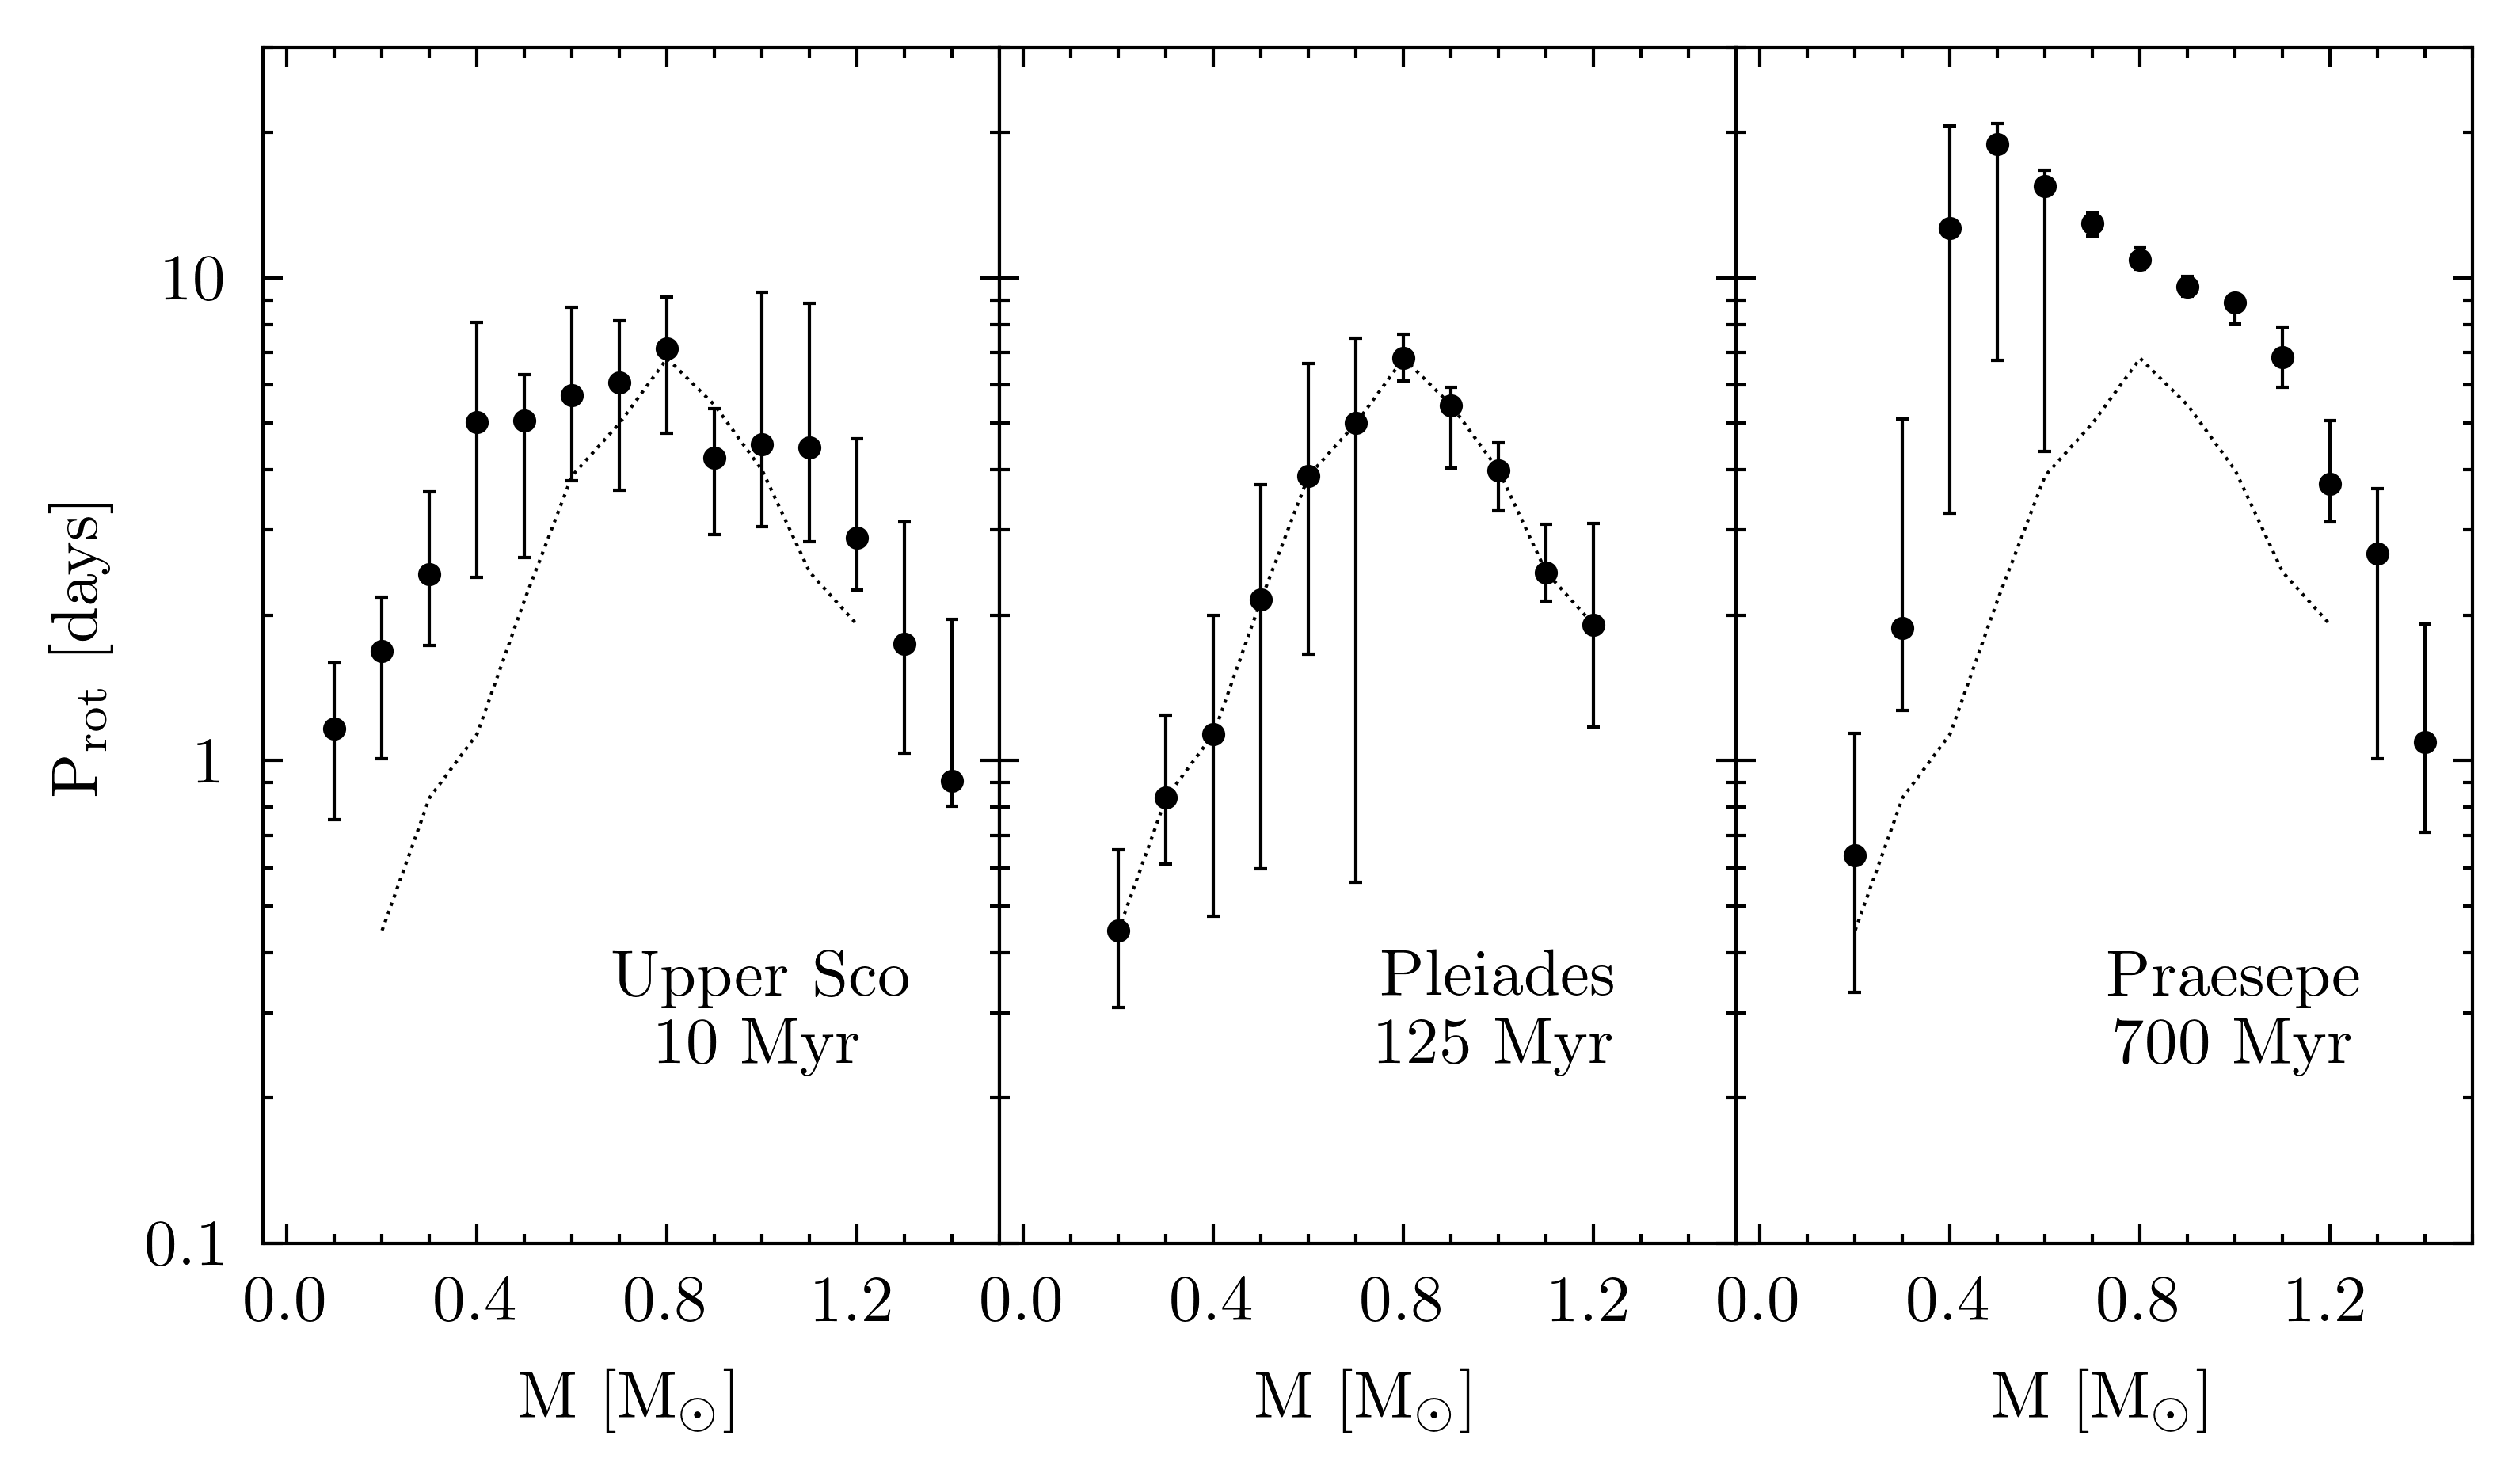

In [4]:
fig,ax = plt.subplots(1,3,figsize=(wInches,hInches),dpi=dpi)
fig.subplots_adjust(wspace=0, hspace=0)

# Axis Limits

minMass = -0.05 # Msun
maxMass = 1.5
minProt = 0.1 # days
maxProt = 30.0 

for i in range(len(clusterList)):
    cluster = clusterList[i]
    ax[i].set_xlim(minMass,maxMass)
    ax[i].set_ylim(minProt,maxProt)
    ax[i].set_yscale('log')
    ax[i].set_yticklabels(['0.1','1','10'])
    ax[i].set_yticks([0.1,1,10])
    ax[i].tick_params('both',length=3,width=lwidth,which='major',direction='in',top='on',right='on')
    ax[i].tick_params('both',length=1.5,width=lwidth,which='minor',direction='in',top='on',right='on')
    ax[i].xaxis.set_major_locator(MultipleLocator(0.4))
    ax[i].xaxis.set_minor_locator(MultipleLocator(0.1))
    ax[i].set_xlabel(rf'M [M$_\odot$]', fontsize=axisFontSize)
    if i > 0:
        ax[i].axes.yaxis.set_ticklabels([])
    else:
        ax[i].set_ylabel(r'P$_{\rm rot}$ [days]',fontsize=axisFontSize)
    ax[i].errorbar(mass[cluster],medProt[cluster],yerr=[iqrPlo[cluster],iqrPup[cluster]],
                   fmt='o',color='black',ms=3,mew=0.5,alpha=1,lw=0.5,capsize=1,zorder=10)
    ax[i].plot(mass['Pleiades'],medProt['Pleiades'],':',lw=0.5,color='black',zorder=9)
    ax[i].text(1.0,0.3,clusterName[i],va='center',ha='center',fontsize=axisFontSize)
    
plt.plot()
plt.savefig(plotFile,bbox_inches='tight',facecolor='white')